In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import normal_modes as nm

We consider two oscillators with the same spring constant $k$ that link three particles of masses $m$ and $M$. This problem has been discussed in class and can also be found in Goldstein.

We first define the matrix for the kinetic energy.

In [15]:
def t_mat(m, M):
    """
    Returns the kinetic energy matrix
    """
    return np.diag([m, M, m])

def t_inv_mat(m, M):
    """
    Returns the inverse of the kinetic energy matrix
    """
    return np.diag([1.0/m, 1.0/M, 1.0/m])

In [16]:
def v_mat(k):
    """
    Returns the potential energy matrix
    """
    
    return k*np.array([[1.0, -1.0, 0.0], [-1.0, 2.0, -1.0], [0.0, -1.0, 1.0]])

In [37]:
def fun(y, t, m, M, k):
    """
    function to integrate here y is a 6-dimensional function
    
    the first 3-dimensions are the derivatives, the next 3-dimensions are the
    positions
    """
    
    w = -np.dot(t_inv_mat(m,M), np.dot(v_mat(k), y[3:]))
    
    return np.concatenate([w[:], y[:3]])

In [38]:
def sol(y_0, t, m, M, k):
    """
    Here we solve the differential equation with the given parameters
    """
    return odeint(fun, y_0, t, args=(m, M, k))

First case:

$m=1$

$M=2$

$k=4$

In [45]:
m = 1
M = 2
k = 4
t_end = 20.0
delt = 12.0
num_points = 400

# this is the initial condition, particles start with zero speed.
#y_0 = np.array([0.0, 0.0, 0.0, -1, 2.0, 1.0])
y_0 = np.array([0.0, 0.0, 0.0, -1, 1.88, 0.0])

In [46]:
time = np.linspace(0.0, t_end, num_points)

In [47]:
soln = sol(y_0, time, m, M, k)

In [48]:
wn = nm.NormalModes(t_mat(m, M), v_mat(k))

In [49]:
print('frequencies are', wn.omega)

frequencies are [  1.40626625e-08   2.00000000e+00   2.82842712e+00]


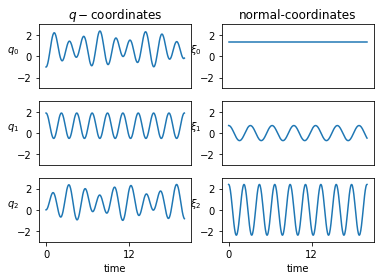

In [50]:
for ind in range(3):
    plt.subplot(321 + 2*ind)
    plt.plot(time, soln[:, 3 + ind])
    plt.ylabel(r'$q_%d$'%ind, rotation=0)
    plt.ylim([-3, 3])
    plt.xticks([])
    if ind==0:
        plt.title(r'$q-$coordinates')
plt.xticks(np.arange(0.0, t_end + 1, delt))
plt.xlabel('time')
for ind in range(3):
    plt.subplot(321 + 2*ind + 1)
    soln_norm = wn.original_2_normal(soln[:, 3:].T).T    
    plt.plot(time, soln_norm[:, ind])
    plt.ylabel(r'$\xi_%d$'%ind, rotation=0)
    plt.ylim([-3, 3])
    plt.xticks([])
    if ind==0:
        plt.title(r'normal-coordinates')
plt.xticks(np.arange(0.0, t_end + 1, delt))
plt.xlabel('time')
plt.show()

You should note that while $q_0(t)$ and $q_1(t)$ are not periodic, the normal modes are always periodic!!!

Second case:

$m=1$

$M=20$

$k=4$

In [12]:
m = 1.0
M = 20.0
k = 4
#t_end = 30.0
t_end = 120
num_points = 400

# this is the initial condition, particles start with zero speed.
y_0 = np.array([0.0, 0.0, 0.0, -1.0, 2.0, 1.0])

In [13]:
wn = nm.NormalModes(t_mat(m, M), v_mat(k))

In [14]:
print('frequencies are', wn.omega)

frequencies are [  1.87178042e-08   2.00000000e+00   2.09761770e+00]


You should note here that the two frequences are such that 

$\Delta \omega = \omega_3 -\omega_2 = 0.097 << 2.000$

Thus, it consists of oscillations with two frequencies 

$
\Omega = \frac{\omega_3+\omega_2}{2} \approx \omega_2 = 2.0
$

$
\epsilon = \frac{\omega_3-\omega_2}{2} \approx 0.0048 \equiv  \pi \nu_{beat}
$

Where $\nu_{beat} $ is called the beat frequency.

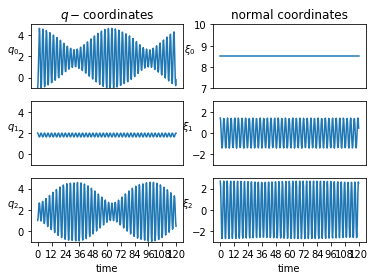

In [15]:
time = np.linspace(0.0, t_end, num_points)
soln = sol(y_0, time, 1, 20.0, 4)

for ind in range(3):
    plt.subplot(321 + 2*ind)
    plt.plot(time, soln[:, 3+ind])
    plt.ylabel(r'$q_%d$'%ind, rotation=0)
    plt.ylim([-1, 5])
    plt.xticks([])
    if ind==0:
        plt.title(r'$q-$coordinates')
plt.xticks(np.arange(0.0, t_end + 1, delt))
plt.xlabel('time')
for ind in range(3):
    plt.subplot(321 + 2*ind + 1)
    soln_norm = wn.original_2_normal(soln[:, 3:].T).T    
    plt.plot(time, soln_norm[:, ind])
    plt.ylabel(r'$\xi_%d$'%ind, rotation=0)
    if ind==0:
        plt.ylim([7, 10])
        plt.title(r'normal coordinates')
    else:
        plt.ylim([-3, 3])
    plt.xticks([])
plt.xticks(np.arange(0.0, t_end + 1, delt))
plt.xticks(np.arange(0.0, t_end + 1, delt))
plt.xlabel('time')
plt.show()
plt.show()

You should note that the heaviest mass, can only oscillate with $\omega_2$!!